### Data Import

In [2]:
# initialize spark session
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
import warnings
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('iteration4').getOrCreate()

In [3]:
# import without schema
from pyspark.sql.types import (StructField, StructType,
                               TimestampType, IntegerType, FloatType)
from pyspark.sql.functions import isnan, when, count, col

In [4]:
# Import the relevant Python libraries.
import numpy as np
import pandas as pd
# Data exploration and data visulation
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams

In [5]:
df = spark.read.csv('cardio_train.csv', header=True, inferSchema=True)

In [6]:
df.show()

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|     0|
|  8|21914|     1|   151|  67.0|  120|   80|          2|   2|    0|   0|     0|     0|
|  9|22113|     1|   157|  93.0|  130|   80|          3|   1|    0|   0|     1|     0|
| 12|22584|     2|   178|  95.0|  130|   90|          3|   3|    0|   0|     1|     1|
| 13|17668|     1|   158|  71.0|  110|   70

In [7]:
df.columns

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [8]:
display(df)

DataFrame[id: int, age: int, gender: int, height: int, weight: double, ap_hi: int, ap_lo: int, cholesterol: int, gluc: int, smoke: int, alco: int, active: int, cardio: int]

In [36]:
df.describe().show(2)

+-------+----------+------------------+------------------+------------------+--------+-----------------+-----------------+------------------+-----------------+-------------------+--------------------+------------------+------+
|summary|        id|               age|            gender|            height|  weight|            ap_hi|            ap_lo|       cholesterol|             gluc|              smoke|                alco|            active|cardio|
+-------+----------+------------------+------------------+------------------+--------+-----------------+-----------------+------------------+-----------------+-------------------+--------------------+------------------+------+
|  count|     70000|             70000|             70000|             70000|   70000|            70000|            70000|             70000|            70000|              70000|               70000|             70000| 70000|
|   mean|49972.4199|19468.865814285713|1.3495714285714286|164.35922857142856|74.20569|128.81

In [37]:
df.head(5)

[Row(id=0, age=18393, gender=2, height=168, weight=62.0, ap_hi=110, ap_lo=80, cholesterol=1, gluc=1, smoke=0, alco=0, active=1, cardio=0),
 Row(id=1, age=20228, gender=1, height=156, weight=85.0, ap_hi=140, ap_lo=90, cholesterol=3, gluc=1, smoke=0, alco=0, active=1, cardio=1),
 Row(id=2, age=18857, gender=1, height=165, weight=64.0, ap_hi=130, ap_lo=70, cholesterol=3, gluc=1, smoke=0, alco=0, active=0, cardio=1),
 Row(id=3, age=17623, gender=2, height=169, weight=82.0, ap_hi=150, ap_lo=100, cholesterol=1, gluc=1, smoke=0, alco=0, active=1, cardio=1),
 Row(id=4, age=17474, gender=1, height=156, weight=56.0, ap_hi=100, ap_lo=60, cholesterol=1, gluc=1, smoke=0, alco=0, active=0, cardio=0)]

In [38]:
# check features and data type
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- ap_hi: integer (nullable = true)
 |-- ap_lo: integer (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- cardio: integer (nullable = true)



In [39]:
# check number of records
print('Number of Rows: ', df.count())

Number of Rows:  70000


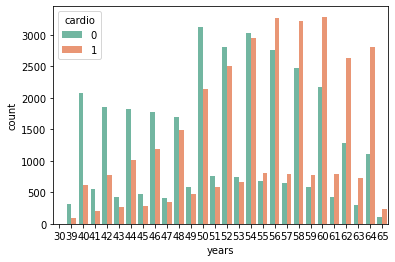

In [40]:
#rcParams['figure.figsize'] = 11, 8
data = df.toPandas()
data['years'] = (data['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = data, palette="Set2"); 

In [41]:
# data audit
df.describe('weight', 'height','ap_lo', 'ap_hi', 'age', 'cardio').show()

+-------+------------------+------------------+------------------+-----------------+------------------+------------------+
|summary|            weight|            height|             ap_lo|            ap_hi|               age|            cardio|
+-------+------------------+------------------+------------------+-----------------+------------------+------------------+
|  count|             70000|             70000|             70000|            70000|             70000|             70000|
|   mean|          74.20569|164.35922857142856| 96.63041428571428|128.8172857142857|19468.865814285713|            0.4997|
| stddev|14.395756678511347| 8.210126364538075|188.47253029638918|154.0114194560919| 2467.251667241397|0.5000034814661851|
|    min|              10.0|                55|               -70|             -150|             10798|                 0|
|    max|             200.0|               250|             11000|            16020|             23713|                 1|
+-------+-------

In [42]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- ap_hi: integer (nullable = true)
 |-- ap_lo: integer (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- cardio: integer (nullable = true)



In [43]:
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|  0|     0|     0|     0|    0|    0|          0|   0|    0|   0|     0|     0|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+



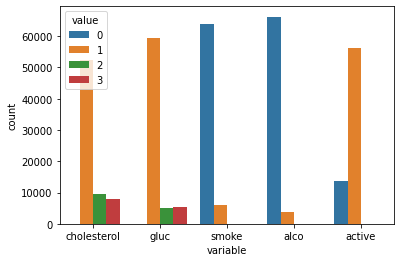

In [44]:
data_categorical = data.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(data_categorical));